In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

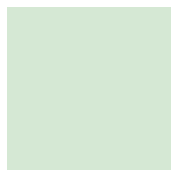

In [58]:
#Create 1x1x3 array
a = np.array( [ [ [ 213, 232, 212 ] ] ] )

plt.figure(figsize=(4, 2))
plt.axis('off')
plt.imshow( a )

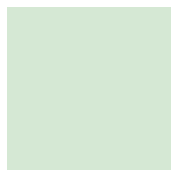

In [190]:
#All methods will create an array of shape 2x2x3 with different values

#z = np.arange( 12 ).reshape( (2,2,3) )     #Array with values 0 to 11
#z = np.zeros((2,2,3), dtype=int )          #Array with all 0s
#z = np.ones( (2,2,3), dtype=int )          #Array with all 1s
a = np.full((2,2,3),2, dtype=int )          #Array with all 2s
a[:] = [213,232,212]                        #Changing final RGB values

plt.figure(figsize=(6, 3))
plt.axis('off')
plt.imshow( a )

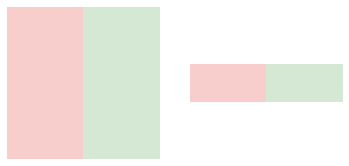

In [191]:
#We can repeat an array to create more rows or columns
a = [ [ [ 248, 206, 204 ], [ 213,232,212 ] ] ]
r0 = np.repeat(a, 2, axis=0)           #Repeat along 0th axis
r1 = np.repeat(a, 2, axis=1)           #Repeat along 1st axis

fig = plt.figure(figsize=(6, 3))
fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.imshow(r0)                        

fig.add_subplot(1, 2, 2)
plt.axis('off')                      
plt.imshow(r1)

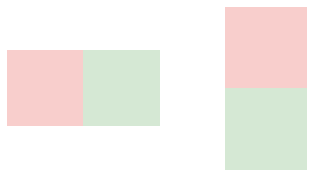

In [193]:
#We can stack two arrays horizontally or vertically
a = [ [ [ 248,206,204 ] ] ]
b = [ [ [ 213,232,212 ] ] ] 
h = np.hstack((a, b))                 #Stack along columns
v = np.vstack((a, b))                 #Stack along rows

fig = plt.figure(figsize=(6, 3))
fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.imshow(h)                        

fig.add_subplot(1, 2, 2)
plt.axis('off')                      
plt.imshow(v)

In [80]:
#np.indices will return array with indices of the grid
a = np.arange(6).reshape( 1,2,3 )

row, column = np.indices( ( 1,2 ) )
print( row )                    #Will return row numbers for all elements
print("------")
print( column )                 #Will return column numbers for all elements
print("------")
print( a[row, column ] )        #To get back complete array back

[[0 0]]
------
[[0 1]]
------
[[[0 1 2]
  [3 4 5]]]


In [195]:
row, column = np.indices( ( 2,2 ) )
condArr = row + column <= 1
print(condArr)

[[ True  True]
 [ True False]]


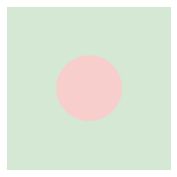

In [98]:
r, c = 500, 500
a = np.zeros( ( r,c,3 ), dtype=int )
a += (213,232,212)
y,x = np.indices((r,c))

#Mask is nothing but an array of same shape but with false or 
#true as elements
mask = (y-r/2)**2 + (x-c/2)**2 < 10e3  #Using circle equation to get right indices
a[mask] = (248,206,204)

plt.figure(figsize=(6, 3))
plt.axis('off')
plt.imshow( a, interpolation='bilinear' )

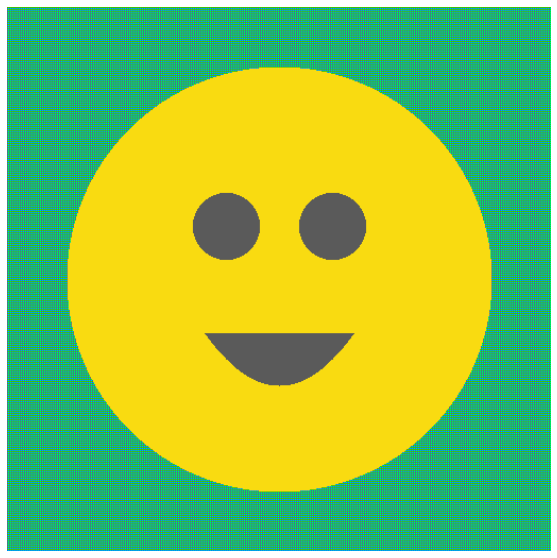

In [251]:
#For Random Background
a = np.array( [ [ [ 132,129,10 ], [ 0,255,0 ] ], [ [ 0,120,255 ], [ 2,200,200 ] ] ] )
for j in range(8):
    a = np.hstack((a,a))
    
for i in range(8):
    a = np.vstack((a,a))
r,c = a.shape[:2]

y,x = np.indices((r,c))

#For Face
mask = (y-r/2)**2 + (x-c/2)**2 < 40e3
a[mask] = (249,219,17)

#One can combine multiple array operations using bit operators
#Two circle equations combined for eyes
mask = ((y-r/2+50)**2 + (x-c/2+50)**2 < 10e2) | ((y-r/2+50)**2 + (x-c/2-50)**2 < 10e2)
a[mask] = (90,90,90)

#Parabola equations and line equation for mouth
mask = ( ( y - r/2 - 100 ) <= -0.01*( x - c/2 )**2 ) & (y>r/2 + 50) 
a[mask] = (90,90,90)

plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow( a, interpolation='bilinear' )